In [504]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

**Questions that the data can explain**
1. How many variables are the dataset
2. How many instances does the dataset have. 
3. What are the datatypes of the variables
4. Do they have missing values
6. What the average of all the numerical values
7. What insight could this data provide
8. Are there any trends in the dataset. 
9. What is the country with the highest and lowest emissions. 
10. Is the dataset Balanced. 


In [505]:
co2_data = pd.read_csv('SYB66_310_202310_Carbon Dioxide Emission Estimates.csv', encoding='latin-1', skiprows=1)

co2_data['Value'] = co2_data['Value'].str.replace(',','').astype(float)
# co2_data['Value'] = co2_data['Value'].str.replace('.','').astype(float)
co2_data.head(10)



,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
0,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,4524.0,NaN,"International Energy Agency, IEA World Energy ..."
1,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,7145.0,NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,3980.0,NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,4074.0,NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2015,Emissions (thousand metric tons of carbon diox...,3975.0,NaN,"International Energy Agency, IEA World Energy ..."
5,8,Albania,2018,Emissions (thousand metric tons of carbon diox...,4525.0,NaN,"International Energy Agency, IEA World Energy ..."
6,8,Albania,2019,Emissions (thousand metric tons of carbon diox...,4200.0,NaN,"International Energy Agency, IEA World Energy ..."
7,8,Albania,2020,Emissions (thousand metric tons of carbon diox...,3512.0,NaN,"International Energy Agency, IEA World Energy ..."
8,8,Albania,1975,Emissions per capita (metric tons of carbon di...,1.8,NaN,"International Energy Agency, IEA World Energy ..."
9,8,Albania,1985,Emissions per capita (metric tons of carbon di...,2.3,NaN,"International Energy Agency, IEA World Energy ..."


In [506]:
series = co2_data['Series'].unique()
data_sourse = co2_data['Source'].unique()

print(f'The available series in dataframe is {series[0]} and {series[1]}')
print(f'The available data sources in dataframe is {data_sourse[0]}')
co2_data.tail(10)

The available series in dataframe is Emissions (thousand metric tons of carbon dioxide) and Emissions per capita (metric tons of carbon dioxide)
The available data sources in dataframe is International Energy Agency, IEA World Energy Balances 2021 and 2006 IPCC Guidelines for Greenhouse Gas Inventories, last accessed April 2023.


,Region/Country/Area,Country,Year,Series,Value,Footnotes,Source
2254,716,Zimbabwe,2019,Emissions (thousand metric tons of carbon diox...,12525.0,NaN,"International Energy Agency, IEA World Energy ..."
2255,716,Zimbabwe,2020,Emissions (thousand metric tons of carbon diox...,10647.0,NaN,"International Energy Agency, IEA World Energy ..."
2256,716,Zimbabwe,1975,Emissions per capita (metric tons of carbon di...,1.1,NaN,"International Energy Agency, IEA World Energy ..."
2257,716,Zimbabwe,1985,Emissions per capita (metric tons of carbon di...,1.1,NaN,"International Energy Agency, IEA World Energy ..."
2258,716,Zimbabwe,2005,Emissions per capita (metric tons of carbon di...,0.9,NaN,"International Energy Agency, IEA World Energy ..."
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8,NaN,"International Energy Agency, IEA World Energy ..."
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7,NaN,"International Energy Agency, IEA World Energy ..."
2263,716,Zimbabwe,2020,Emissions per capita (metric tons of carbon di...,0.5,NaN,"International Energy Agency, IEA World Energy ..."


# The  types of data found in the dataset
1. The dataset contains 3  numerical columns which are the  Region/Country/Area , Year and Values. Year and Region/Country/Area columns will be set to be string so that the analysics be clearer.
2. The dataset contains 3 other non numerical columns which are Unnamed: 1 , Series and Source, it also have footnotes columns which will be droped because it has no vlaues and these values are not helpfull to our indended analysis.

# Data sources
The whole dataset were abytained from "International Energy Agency, IEA World Energy Balances 2021 and 2006 IPCC Guidelines for Greenhouse Gas Inventories, last accessed April 2023." and the they were agregated together by UN.

# Data series
The dataframe have two parts, one part talks about  Emissions (thousand metric tons of carbon dioxide) and other one talks about Emissions per capita (metric tons of carbon dioxide).

#### The we renamed the unnamed column by country because it looks like it talks about countries, we also droped the repetivive columns so that we will be having simple dataframes while doing analysis and in addition to having talked baout then in the above cells.

In [507]:
#renaming the Unnamed: 1 to Country 
co2_data.rename(columns= {"Unnamed: 1":"Country"},inplace=True)

#dropping Foot notes columns 

co2_data.drop(columns=["Footnotes","Source"], inplace=True)


***Observation***
 1. The Column with the name Unnamed was renamed to Country because it represent country names. 
 2. The columns Footnotes, Source and Series  was dropped because  they are not relevant in the analysis process, 

# Question 01  : Shape of the dataset

In [508]:
#shape of the dataset 
shape = co2_data.shape

print(f'The dataframe has now has {shape[1]} columns and {shape[0]} rows, this means that the data se have has {shape[0]} number of abservations combining emmeison per capita and emmision per country')

The dataframe has now has 5 columns and 2264 rows, this means that the data se have has 2264 number of abservations combining emmeison per capita and emmision per country


# Question 02  :  The name of columns which are present in the dataset. 

In [509]:
co2_data.columns.unique()

Index(['Region/Country/Area', 'Country', 'Year', 'Series', 'Value'], dtype='object')

***Observation***
1. The dataset has 2264 rows and 4 columns 
2. The columns that are present in the dataset are 'Region/Country/Area', 'Country', 'Year', 'Value'

# Question 03: What are the datatypes of the dataset and are there missing values 

In [510]:
#checking the data types and Missing values of the dataset
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  2264 non-null   int64  
 1   Country              2264 non-null   object 
 2   Year                 2264 non-null   int64  
 3   Series               2264 non-null   object 
 4   Value                2264 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 88.6+ KB


## Insights 

1. The dataset seems not to have any missing values. 
2. The datatype for the column Value is object but it should be changed to Float 64 for easy computation. 
3. Now the whole dataframe has size of 70.9+ kb, this is a small dataset and this means that doing computation with these data will not be too costy.

In [511]:
#create separate datasets or columns for   thousand metric tons  emission 
# k_co2 = co2_data[co2_data['Value'].str.contains(',')]

k_co2 = co2_data[co2_data['Series']=='Emissions (thousand metric tons of carbon dioxide)']
#create a separate dataset for  metric tons per capita
p_co2 = co2_data[co2_data['Series']=='Emissions per capita (metric tons of carbon dioxide)']
#renamong the value columns 
k_co2.rename(columns= {"Value":"CO2/kt"},inplace=True)
p_co2.rename(columns= {"Value":"CO2/t_per_capita"},inplace=True)


In [513]:
#changing the datatype of Value column to float 
# p_co2['CO2/t_per_capita'] = p_co2['CO2/t_per_capita'].astype(float)



In [514]:
#observing the dataset 
p_co2.head(10)

,Region/Country/Area,Country,Year,Series,CO2/t_per_capita
8,8,Albania,1975,Emissions per capita (metric tons of carbon di...,1.8
9,8,Albania,1985,Emissions per capita (metric tons of carbon di...,2.3
10,8,Albania,2005,Emissions per capita (metric tons of carbon di...,1.3
11,8,Albania,2010,Emissions per capita (metric tons of carbon di...,1.4
12,8,Albania,2015,Emissions per capita (metric tons of carbon di...,1.3
13,8,Albania,2018,Emissions per capita (metric tons of carbon di...,1.5
14,8,Albania,2019,Emissions per capita (metric tons of carbon di...,1.4
15,8,Albania,2020,Emissions per capita (metric tons of carbon di...,1.2
24,12,Algeria,1975,Emissions per capita (metric tons of carbon di...,0.8
25,12,Algeria,1985,Emissions per capita (metric tons of carbon di...,1.9


In [515]:
p_co2.tail(10)

,Region/Country/Area,Country,Year,Series,CO2/t_per_capita
2246,894,Zambia,2019,Emissions per capita (metric tons of carbon di...,0.4
2247,894,Zambia,2020,Emissions per capita (metric tons of carbon di...,0.4
2256,716,Zimbabwe,1975,Emissions per capita (metric tons of carbon di...,1.1
2257,716,Zimbabwe,1985,Emissions per capita (metric tons of carbon di...,1.1
2258,716,Zimbabwe,2005,Emissions per capita (metric tons of carbon di...,0.9
2259,716,Zimbabwe,2010,Emissions per capita (metric tons of carbon di...,0.7
2260,716,Zimbabwe,2015,Emissions per capita (metric tons of carbon di...,0.8
2261,716,Zimbabwe,2018,Emissions per capita (metric tons of carbon di...,0.7
2262,716,Zimbabwe,2019,Emissions per capita (metric tons of carbon di...,0.7
2263,716,Zimbabwe,2020,Emissions per capita (metric tons of carbon di...,0.5


In [516]:
#merge the two datasets  using country columns 

#create separate datasets or columns for   thousand metric tons  emission 

k_co2 = k_co2[['Country', 'Year', 'CO2/kt']]

merged_data = pd.merge(k_co2, p_co2, on=['Country', 'Year'])
merged_data.rename(columns={'Value_x':'CO2/kt','Value_y':"CO2/t_per_capita"}, inplace=True)


merged_data['Region/Country/Area'] = merged_data['Region/Country/Area'].astype(str)
merged_data['Year'] = merged_data['Year'].astype(str)


In [517]:
#confirming the shape of data 
p_co2.shape[0] + k_co2.shape[0]

2264

***Observation***
1. After merging the dataset has 2264 rows meaning the merging process was a success. 


In [534]:
#statistical description of the dataset
merged_data.describe()

,CO2/kt,CO2/t_per_capita
count,1.132000e+03,1132.000000
mean,1.864666e+05,4.815194
std,7.961223e+05,5.827506
min,4.600000e+01,0.000000
25%,6.564250e+03,0.800000
50%,2.226750e+04,3.100000
75%,8.594575e+04,6.700000
max,1.019064e+07,60.300000


### Insights from the Statistical description  :: TODO peter 
1. The maximum emission of co2 per capita for all the countries was 998 metric Tones and the minimum emission per capita was 0 metric tonnes. 
2. The mean emission of co2 per capita was 14.59 metric tonnes for all the countries  while the total mean emission per country was 193755.9 Thousand metric tonnes. 


Question 04: Is there any trend in the co2 emmission ? 

In [520]:
merged_data['Year'].unique()

array(['1975', '1985', '2005', '2010', '2015', '2018', '2019', '2020'],
      dtype=object)

In [521]:
#Checking for the trend  of co2 emission per capita in the data 

grouped_data = merged_data.groupby('Year').mean()

grouped_data

,CO2/kt,CO2/t_per_capita
Year,,
1975,106532.596639,4.473109
1985,122494.760331,4.652066
2005,177841.533784,5.257432
2010,200663.641892,5.144595
2015,210793.020134,4.974497
2018,219156.637584,4.825503
2019,218265.872483,4.712752
2020,207906.583893,4.387248


***Observations from the c02 trend line ***
1. The amount of co2   emission  per capita is decreasing , meaning individuals emission of co2 has been decreasing posing a positive impact to the enviroment, Other secondary meaning are indications of transition from heavy industries which uses heavy machinery and fossil fuel to renewable sustainable energies. 
2. Another indication can be the presence of policies which emphasizes usage of clean energy. 

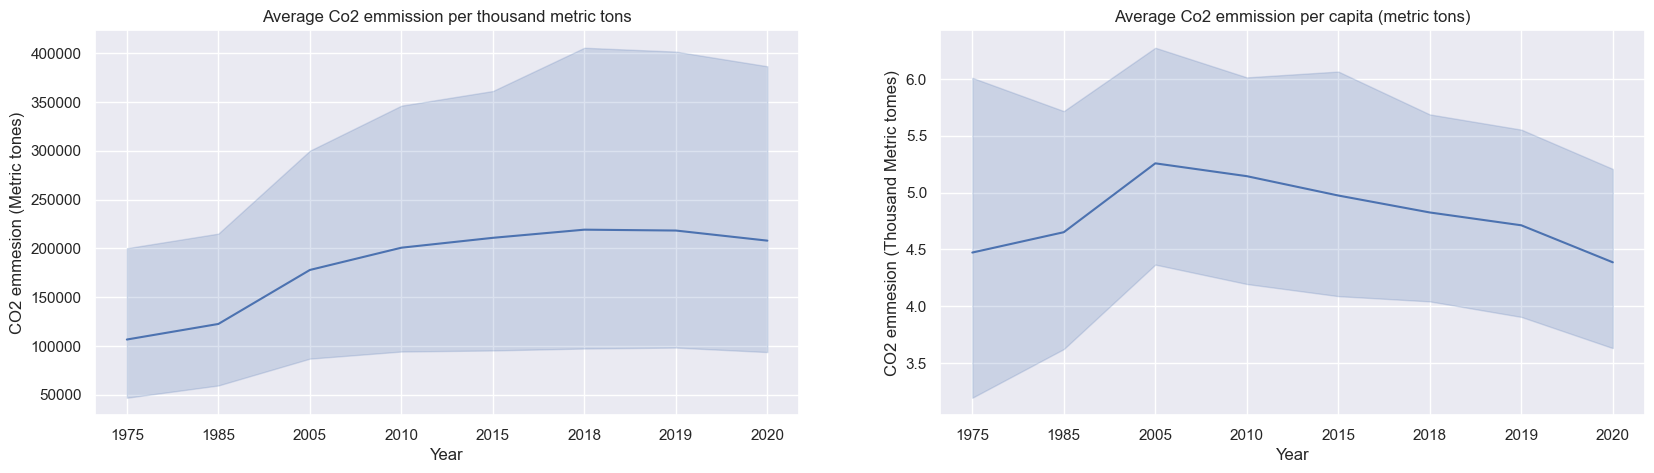

In [522]:
#Checking for the trend  of co2 emission per thousand metric tons  in the data 
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

axes = ax[0]
sns.lineplot(data=merged_data, y='CO2/kt',x='Year', ax=axes)
axes.set_title("Average Co2 emmission per thousand metric tons")
axes.set_ylabel("CO2 emmesion (Metric tones)")
# plt.show()


axes = ax[1]
sns.lineplot(data=merged_data, y='CO2/t_per_capita',x='Year', ax=axes)
axes.set_title("Average Co2 emmission per capita (metric tons)")
axes.set_ylabel("CO2 emmesion (Thousand Metric tomes)")
plt.show()


***Observation***
1. The co2 emission has been decreasing throughout the years as indicated by the time series , which suggests adoption of clean energies in industrial processes , introduction of  policies against emissions , and technological innovations which enable mass adoption of enviromental positive processes. 
2. The  decrease in general  emission  of co2 has been decresing slowly compared to the emission per capita. 

Question 06: Are there nan/Missing  values or Outliers  in the data ? 

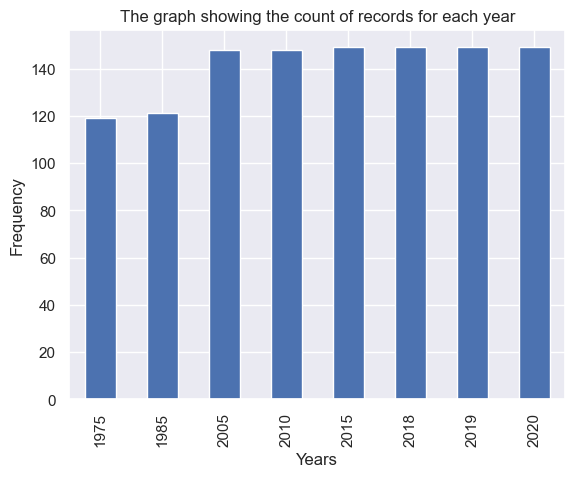

In [523]:
balance_check = merged_data.groupby('Year').count()

balance_check['Country'].plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title("The graph showing the count of records for each year")
plt.show()

***Observation***
1. With the graph indicating almost equal records in each year from 2005 to 2020 , Meaning the data is almost balanced and thus each year Co2  emission influence is almost properly showing its impact in the insights provided. 

In [524]:
#asessing distribution of the data #TODO

Question 07: Identify countries with the highests and lowest emission 


In [525]:
grouped_data = merged_data.groupby("Country").mean()
grouped_data.reset_index(inplace=True)

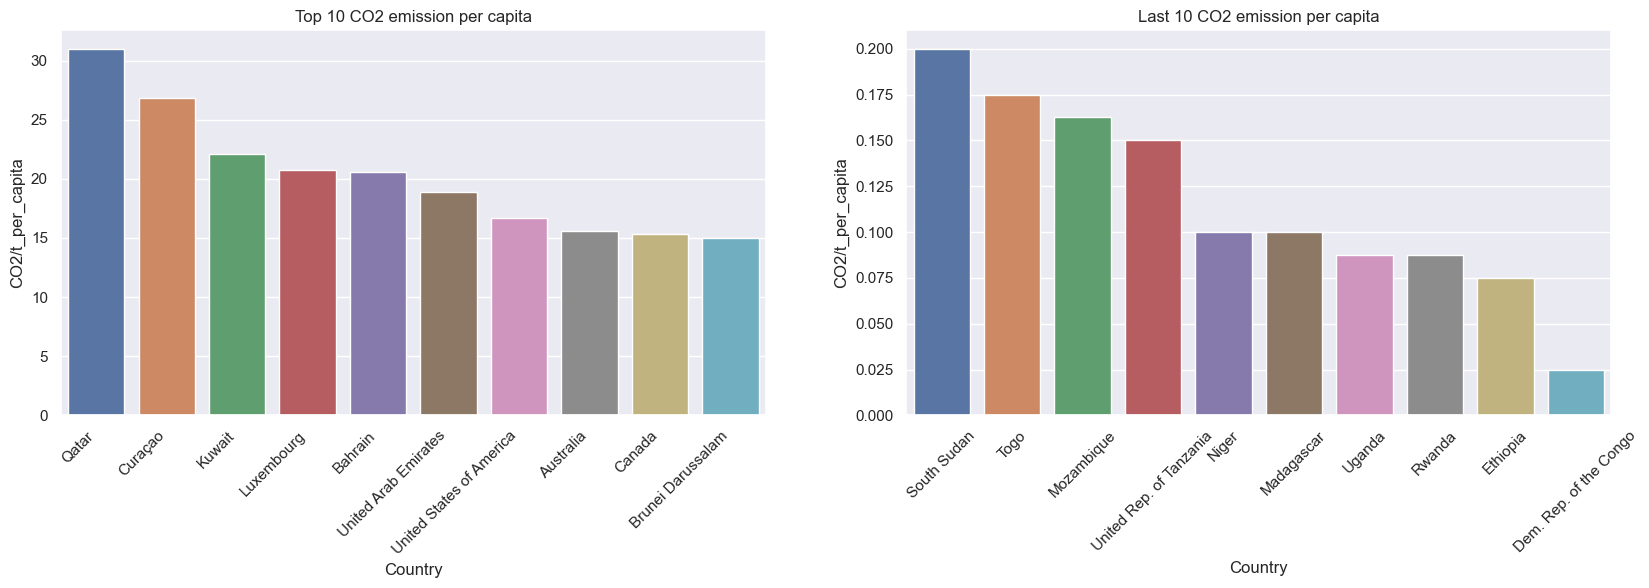

In [526]:
grouped_data_sorted = grouped_data.sort_values(by='CO2/t_per_capita', ascending=False)
first_10 = grouped_data_sorted.head(10)
last_10 = grouped_data_sorted.tail(10)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

axes = ax[0]
sns.barplot(x='Country', y='CO2/t_per_capita', data=first_10, ax=axes)
axes.set_title('Top 10 CO2 emission per capita')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

axes = ax[1]
sns.barplot(x='Country', y='CO2/t_per_capita', data=last_10, ax=axes)
axes.set_title('Last 10 CO2 emission per capita')
plt.xticks(rotation =45)
plt.show()

***Observations***
1. The graphs contains the  mean Co2 emission per capita  for top 10 and last 10 countries, The mean was taken inorder to incorporate the average magnitude of all the countries emission records through the years. 
2. Eswatini recorded as the country with the highest mean co2 emission per capita, A small country in southern africa, Meaning a drastic increase in population might not be directly proportional with the efforts to reduce co2 emission. 
3. On the other hand the most of the countries in the top 10 co2 emittors per capita are relatively  small countries example, Mauritius , Rwanda, Haiti m Benin and Eswatini  in which the inference might be the  population and economical growth of these countries might not go hand in hand  with efforts to reduce  emissions. 
4. On the other hand the countries in the last 10 Co2 emittors per capita atleast has something in common as in they are relatively bigger than the First ten emittors and most of them has vast lands of dense forests, Example Tanzania , Dem rep of Congo , Cameroon and others which might suggest the impact of these forests to reduce the impact of emissions recorded. 


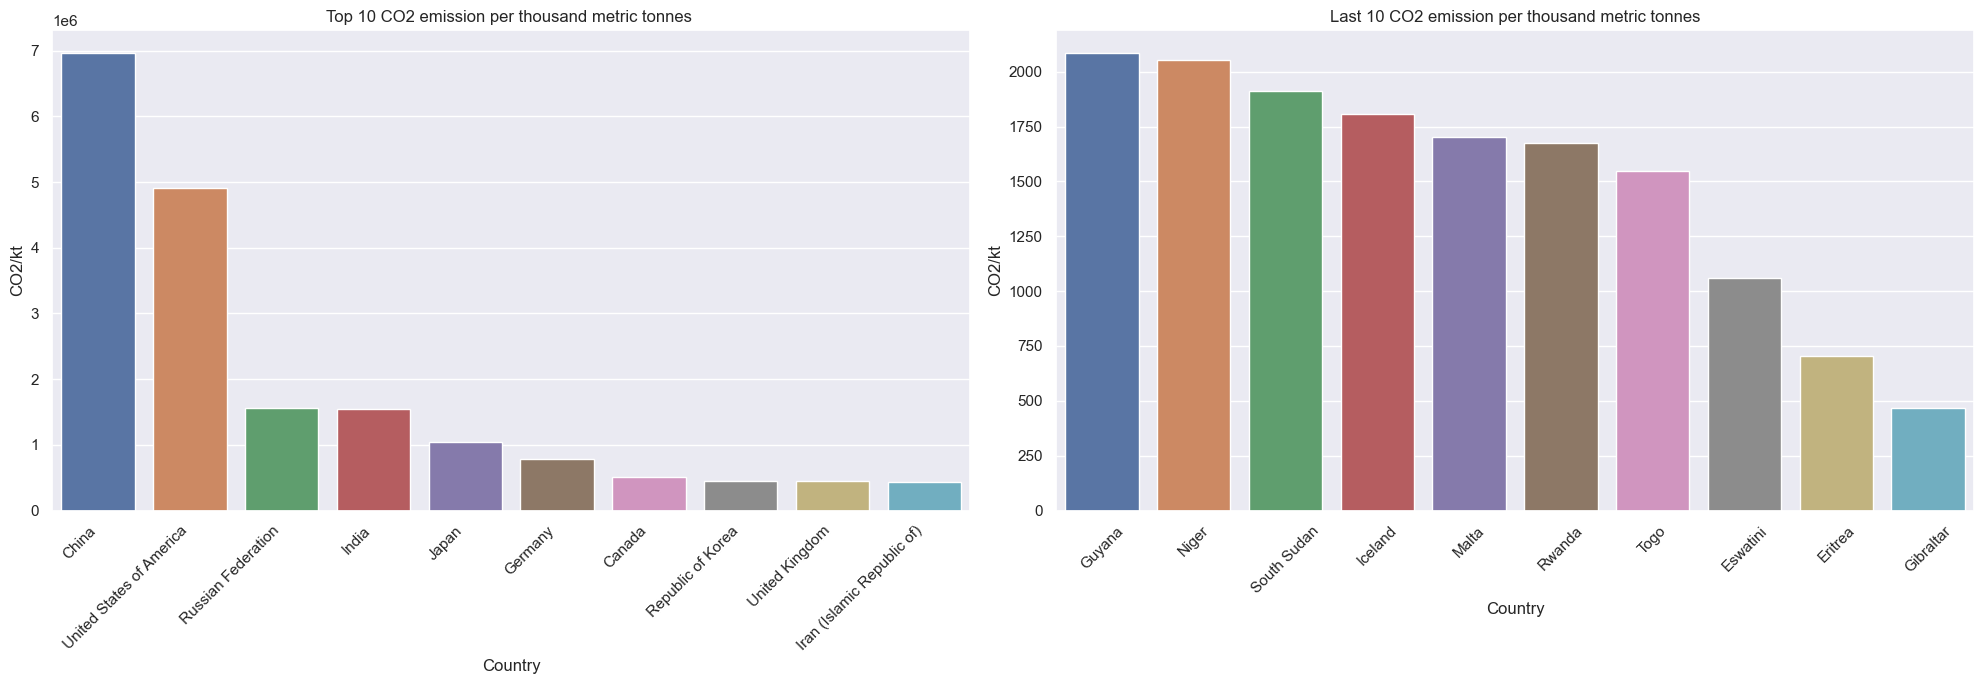

In [527]:

grouped_data_sorted = grouped_data.sort_values(by='CO2/kt', ascending=False)
first_10 = grouped_data_sorted.head(10)
last_10 = grouped_data_sorted.tail(10)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

axes = ax[0]
sns.barplot(x='Country', y='CO2/kt', data=first_10, ax=axes)
axes.set_title('Top 10 CO2 emission per thousand metric tonnes ')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

axes = ax[1]
sns.barplot(x='Country', y='CO2/kt', data=last_10, ax=axes)
axes.set_title('Last 10 CO2 emission per thousand metric tonnes')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

***Observations***
1. The above graph encorporate the top 10 and last ten countries in measurements of Co2 emissions per thousan metric tonnes. 
2. China and United States are on top of the list since they are both heavily industrialised and big nations in land size , Followed by the Russian Federation the largest country on earth.
3. On the other hand India follows of which it's emission might be influenced by being the most  populous country on earth. 
4. United States and China emission are way higher than other countries which indicates the vast amounts of Co2  that  both of these countries emit compared to other countries. 
5. On the other hand countries like Rwanda and Eswatini which were among the top 10 emittors as per Co2 emission per capita are on the last 10 C02 emission per thousan metric tonnes resonably because  their emissions are small compared to the rest of the world. 
6. A general observation is most of the countries in the last 10 Co2 emission per thousan metric tonnes are small countries whose emission  has to be very small compared to the rest of the world. 

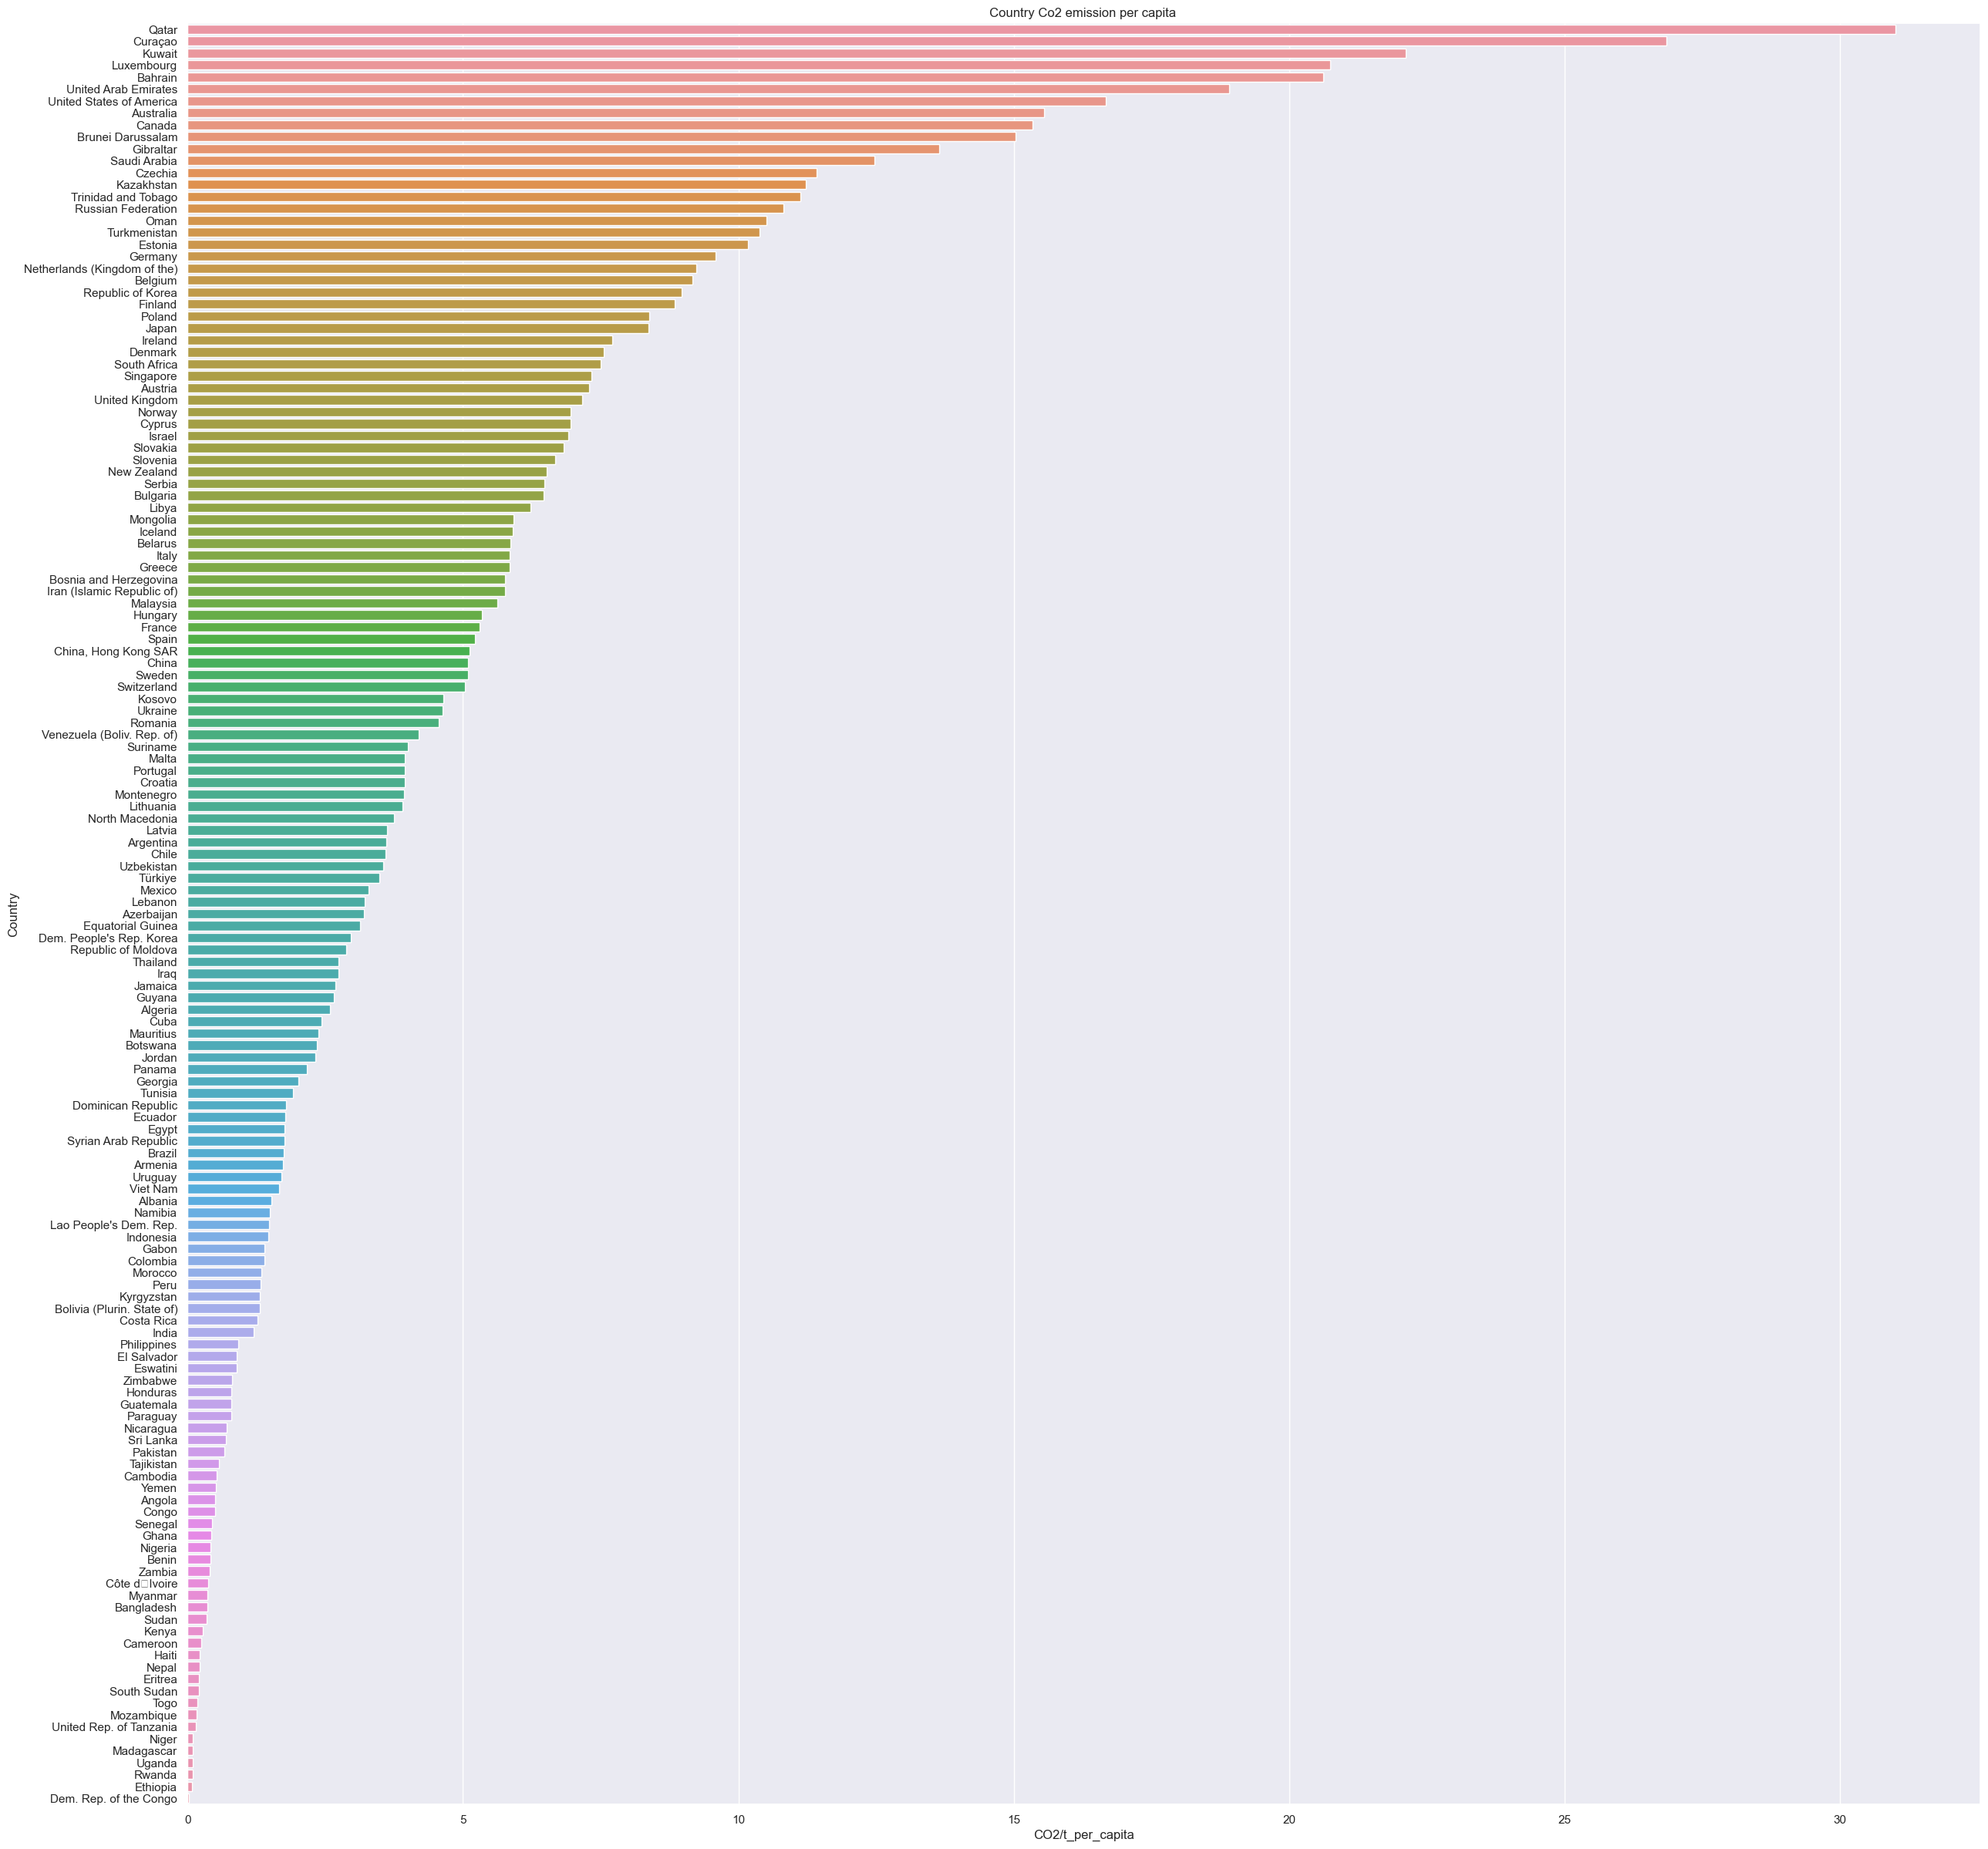

In [528]:
#country co2 emission per capita 
countries_sorted_capita = grouped_data.sort_values(by='CO2/t_per_capita', ascending=False)
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
sns.barplot(data= countries_sorted_capita, y='Country' ,x ='CO2/t_per_capita' )
plt.title("Country Co2 emission per capita ")
plt.show()

***Observations***
1. The graph above shows a general overview of Co2 emissions per capita for  all the countries represented  in the dataset.  Eswatini  on top of the list and  Democratic rep of Congo last in the list. 


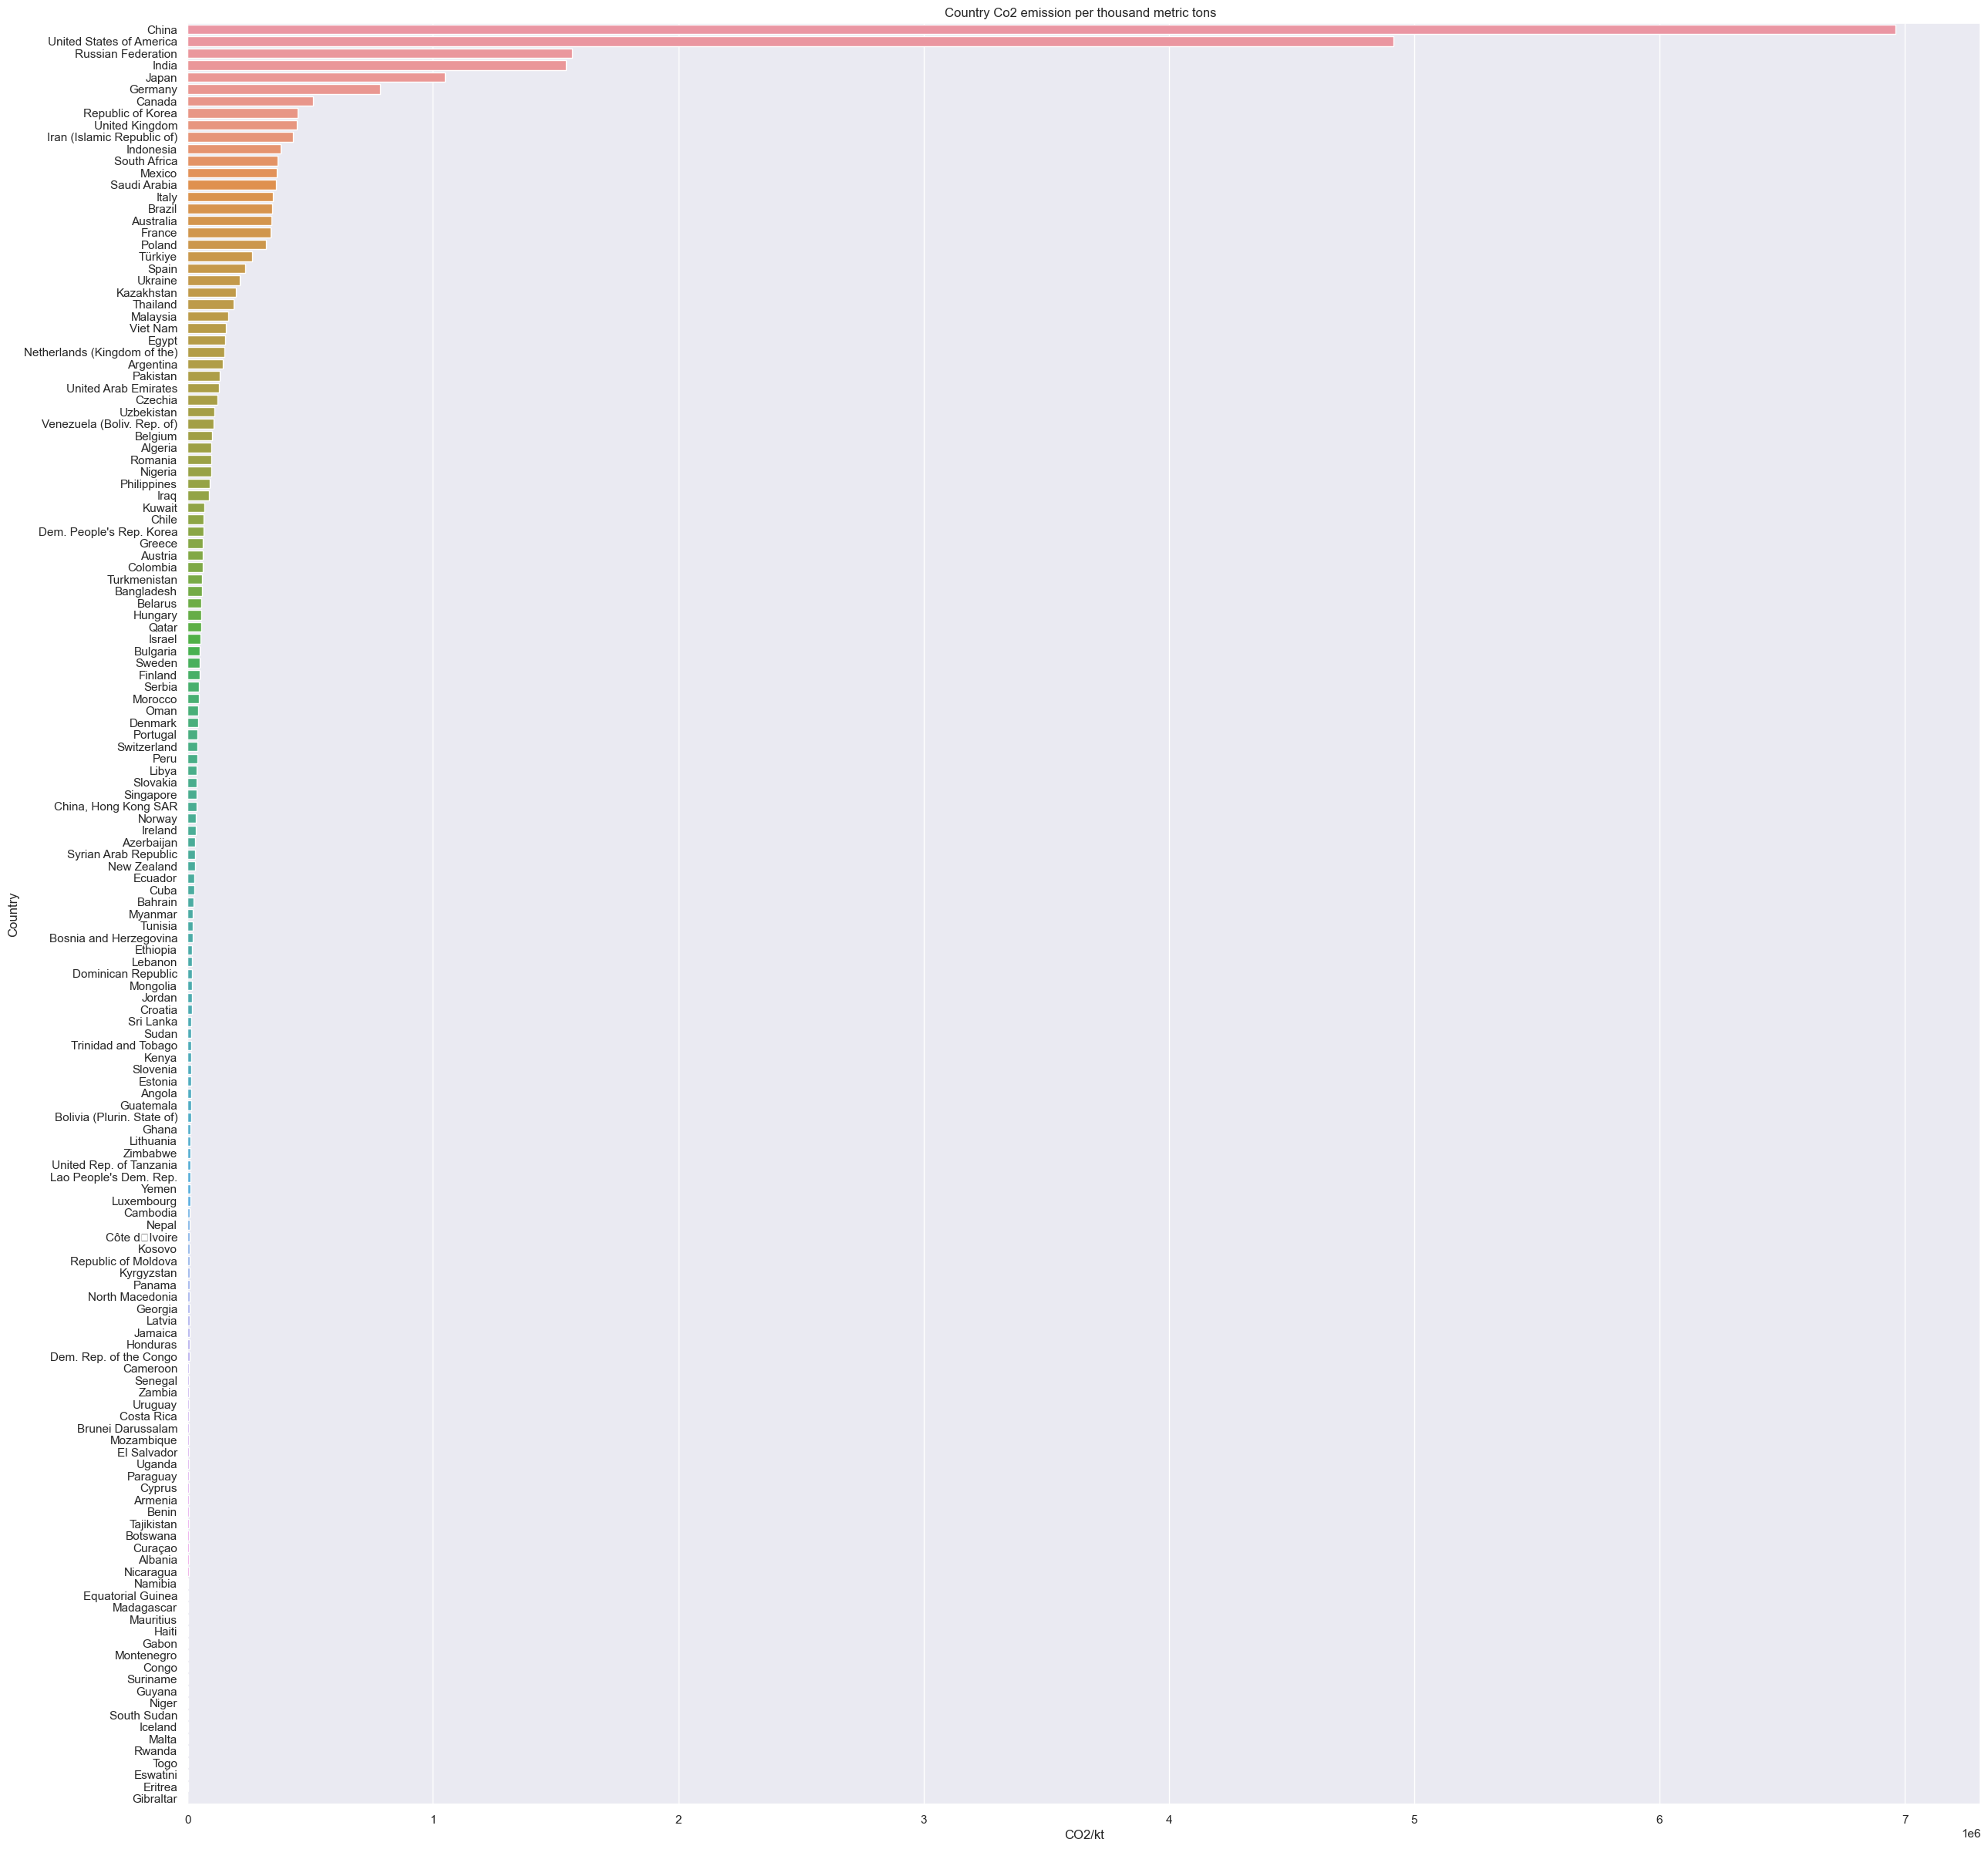

In [529]:
#country co2 emission per thousand metric tons 
countries_sorted_k = grouped_data.sort_values(by='CO2/kt', ascending=False)
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
sns.barplot(data= countries_sorted_k, y='Country' ,x ='CO2/kt' )
plt.title("Country Co2 emission per thousand metric tons  ")
plt.show()

***Observations***
1. The graph above shows a general overview of Co2 emissions per thousan metric tonnes  for  all the countries represented  in the dataset.  China   on top of the list and  Eswatini last in the list. 


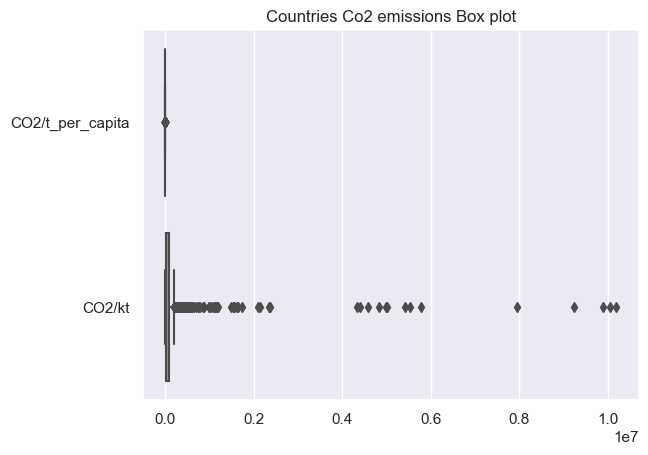

In [530]:

sns.boxplot(data=merged_data[['CO2/t_per_capita','CO2/kt' ]],orient="h")
plt.title("Countries Co2 emissions Box plot")
plt.show()

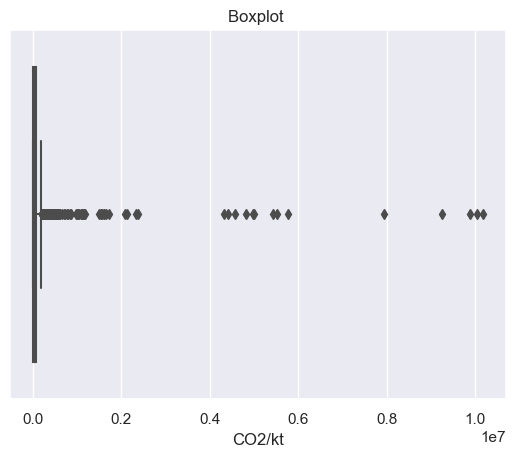

In [531]:
sns.boxplot(data= merged_data , x= 'CO2/kt')
plt.title('Boxplot ')
plt.show()

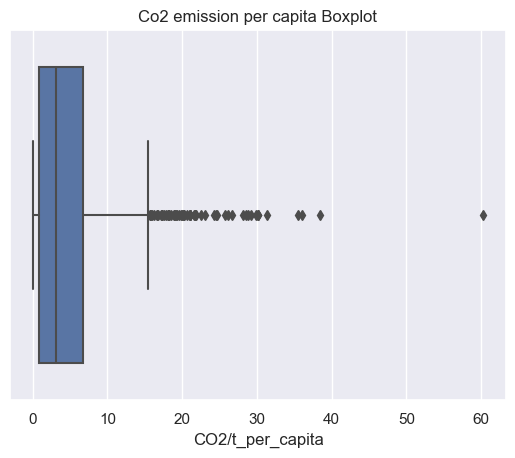

In [532]:
sns.boxplot(data= merged_data , x='CO2/t_per_capita')
plt.title('Co2 emission per capita Boxplot')
plt.show()

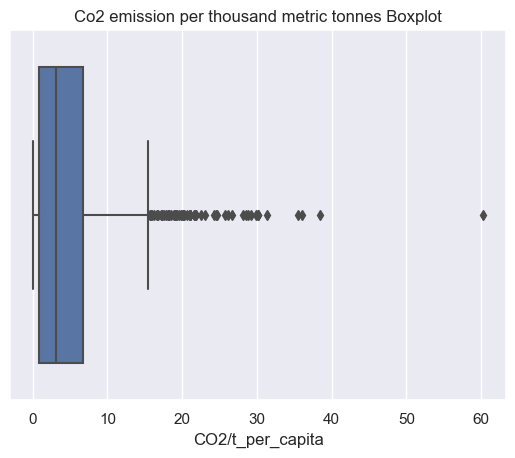

In [533]:
sns.boxplot(data= merged_data , x= 'CO2/t_per_capita')
plt.title('Co2 emission per thousand metric tonnes Boxplot')
plt.show()